In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
data = pd.read_excel('OnlineRetail (1).xlsx')

In [3]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

In [5]:
global_popular_products = data.pivot_table(index='Description', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False)
global_popular_products.head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


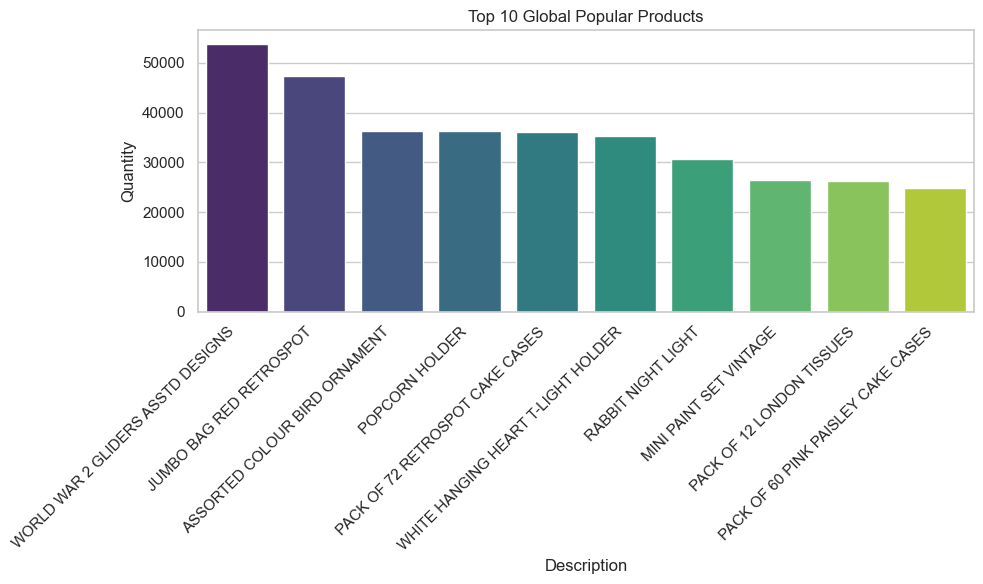

In [6]:
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Plot global popular products
global_popular_products_subset = global_popular_products.head(10)
sns.barplot(data=global_popular_products_subset, x=global_popular_products_subset.index, y='Quantity', ax=axes, palette='viridis')
axes.set_title('Top 10 Global Popular Products')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
country_popular_products = data.pivot_table(index=['Country', 'Description'], values='Quantity', aggfunc='sum').sort_values(['Country', 'Quantity'], ascending=[True, False])
country_popular_products.head(10)

Quantity
Country   Description                            
Australia MINI PAINT SET VINTAGE             2916
          RABBIT NIGHT LIGHT                 1884
          RED  HARMONICA IN BOX              1704
          RED TOADSTOOL LED NIGHT LIGHT      1344
          DOLLY GIRL LUNCH BOX               1024
          HOMEMADE JAM SCENTED CANDLES        994
          SPACEBOY LUNCH BOX                  960
          BLUE HARMONICA IN BOX               720
          MINI JIGSAW SPACEBOY                720
          4 TRADITIONAL SPINNING TOPS         700

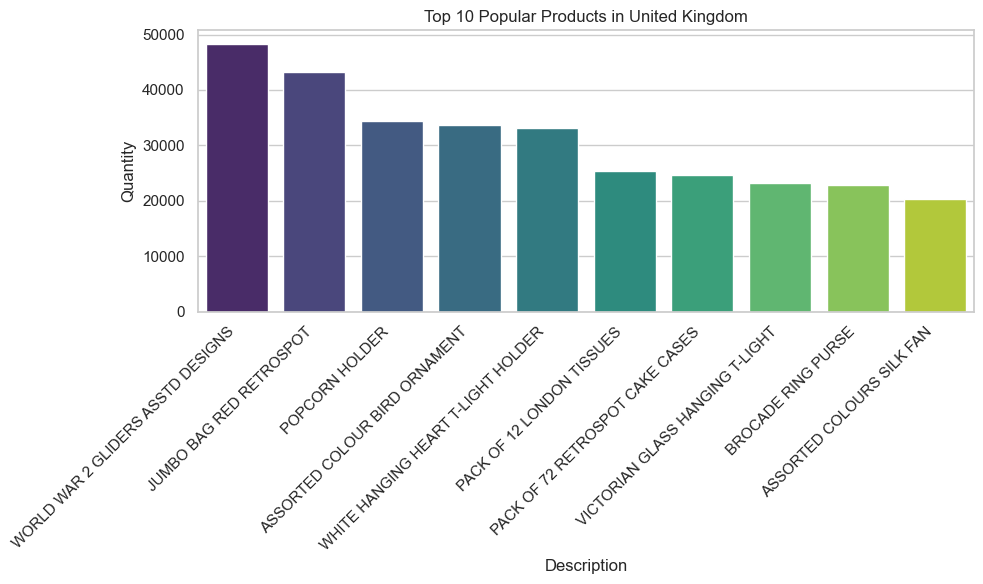

In [8]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Plot country-wise popular products (choose a specific country, e.g., 'United Kingdom')
country_name = 'United Kingdom'
country_popular_products_subset = country_popular_products.loc[country_name].head(10)
sns.barplot(data=country_popular_products_subset, x=country_popular_products_subset.index.get_level_values('Description'), y='Quantity', ax=axes, palette='viridis')
axes.set_title(f'Top 10 Popular Products in {country_name}')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
month_popular_products = data.pivot_table(index=['Year', 'Month', 'Description'], values='Quantity', aggfunc='sum').sort_values(['Year', 'Month', 'Quantity'], ascending=[True, True, False])
month_popular_products.head(5)

Quantity
Year Month Description                                 
2010 12    WORLD WAR 2 GLIDERS ASSTD DESIGNS       5195
           PACK OF 72 RETROSPOT CAKE CASES         4076
           HAND WARMER BABUSHKA DESIGN             3382
           WHITE HANGING HEART T-LIGHT HOLDER      3343
           SMALL POPCORN HOLDER                    2731

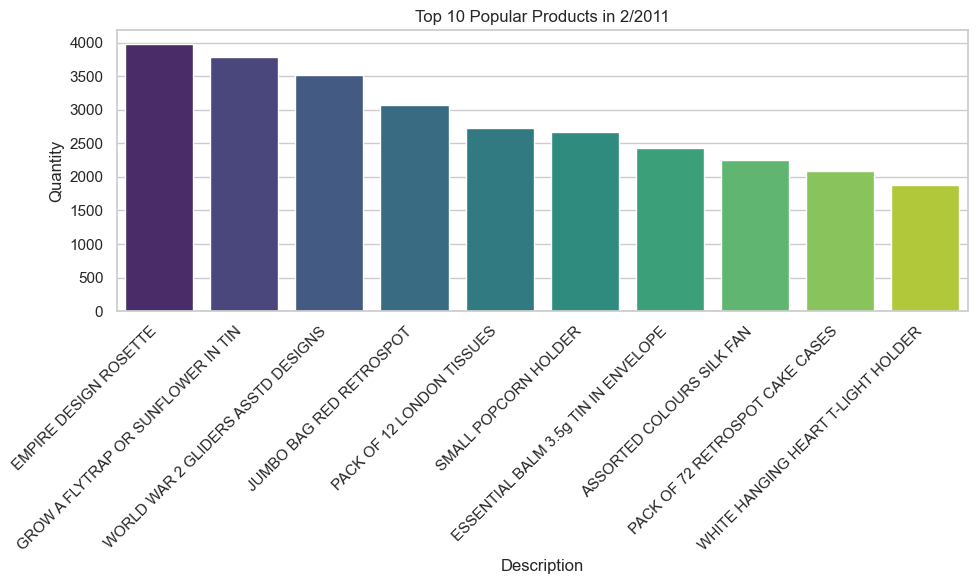

In [10]:
chosen_year = 2011
chosen_month = 2

# Filter the month_popular_products pivot table for the chosen month and year
chosen_month_products = month_popular_products.query(f"Year == {chosen_year} and Month == {chosen_month}").head(10)

# Create a figure with subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Plot month-wise popular products
sns.barplot(data=chosen_month_products, x=chosen_month_products.index.get_level_values('Description'), y='Quantity', ax=axes, palette='viridis')
axes.set_title(f'Top 10 Popular Products in {chosen_month}/{chosen_year}')
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
def get_recommendations(item_name, threshold=0.2, top_n=5, item_correlation=None):
    similar_scores = item_correlation[item_name].sort_values(ascending=False)
    similar_items = similar_scores[similar_scores > threshold].index.tolist()
    similar_items.remove(item_name)
    return similar_items[:top_n]

In [12]:
def generate_recommendations(data, threshold=0.2, top_n=3):
    global_pivot = data.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)
    global_item_correlation = global_pivot.corr(method='pearson', min_periods=5)

    recommendations_by_country = {}
    for country in data['Country'].unique():
        country_data = data[data['Country'] == country]
        country_pivot = country_data.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)
        country_item_correlation = country_pivot.corr(method='pearson', min_periods=5)

        recommendations = {}
        for item_name in data['Description'].unique():
            if item_name in country_item_correlation.columns:
                similar_scores = country_item_correlation[item_name].sort_values(ascending=False)
                similar_items = similar_scores[similar_scores > threshold].index.tolist()
                if item_name in similar_items:
                    similar_items.remove(item_name)
                recommendations[item_name] = similar_items[:top_n]

        recommendations_by_country[country] = recommendations
    
    return global_pivot, global_item_correlation, recommendations_by_country

In [13]:
global_pivot, global_item_correlation, recommendations_by_country = generate_recommendations(data)

Global Recommendations for 'GREEN VINTAGE SPOT BEAKER':
['PINK VINTAGE SPOT BEAKER', 'BLUE VINTAGE SPOT BEAKER', 'POTTING SHED CANDLE CITRONELLA', 'POTTING SHED ROSE CANDLE', 'CAST IRON HOOK GARDEN FORK']


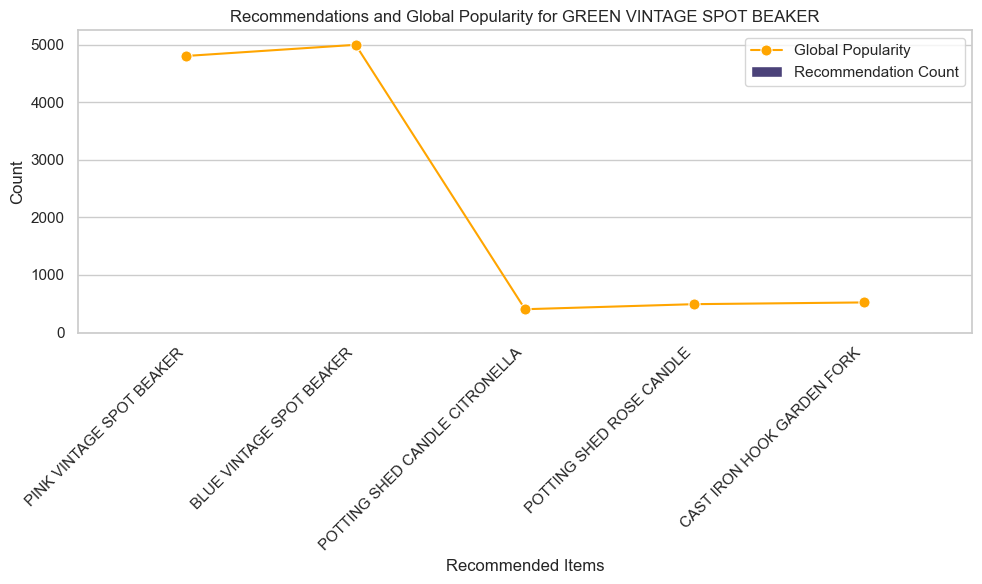

In [14]:
item_name = "GREEN VINTAGE SPOT BEAKER"
global_recommendations = get_recommendations(item_name, threshold=0.2, top_n=5, item_correlation=global_item_correlation)
print(f"Global Recommendations for '{item_name}':")
print(global_recommendations)

# Count the occurrences of each recommended item
recommendations_count = pd.Series(global_recommendations).value_counts()

# Create a DataFrame from the recommendations count
recommendations_df = pd.DataFrame({'Recommended Items': recommendations_count.index, 'Count': recommendations_count.values})

# Pivot table for global popular products
global_popular_products = data.pivot_table(index='Description', values='Quantity', aggfunc='sum').sort_values('Quantity', ascending=False)

# Merge recommendations_df with global_popular_products to get popularity information
recommendations_df = recommendations_df.merge(global_popular_products, left_on='Recommended Items', right_index=True, how='left')

# Set up Seaborn
sns.set(style="whitegrid")

# Create a figure with a subplot
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Create a bar chart for recommendations with global popularity
sns.barplot(data=recommendations_df, x='Recommended Items', y='Count', ax=axes, palette='viridis', label='Recommendation Count')
sns.lineplot(data=recommendations_df, x='Recommended Items', y='Quantity', ax=axes, color='orange', marker='o', markersize=8, label='Global Popularity')

# Add legend
axes.legend()

# Rotate x-axis labels for better readability
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

# Set labels and title
axes.set_xlabel('Recommended Items')
axes.set_ylabel('Count')
axes.set_title(f'Recommendations and Global Popularity for {item_name}')

# Show the plot
plt.tight_layout()
plt.show()

Top Popular Recommendations in United Kingdom for GREEN VINTAGE SPOT BEAKER:
ORANGE VOTIVE CANDLE: 117 times
BEADED CRYSTAL HEART GREEN ON STICK: 112 times
BLACK STITCHED WALL CLOCK: 109 times
PORCELAIN BUDAH INCENSE HOLDER: 105 times
URBAN BLACK RIBBONS: 105 times


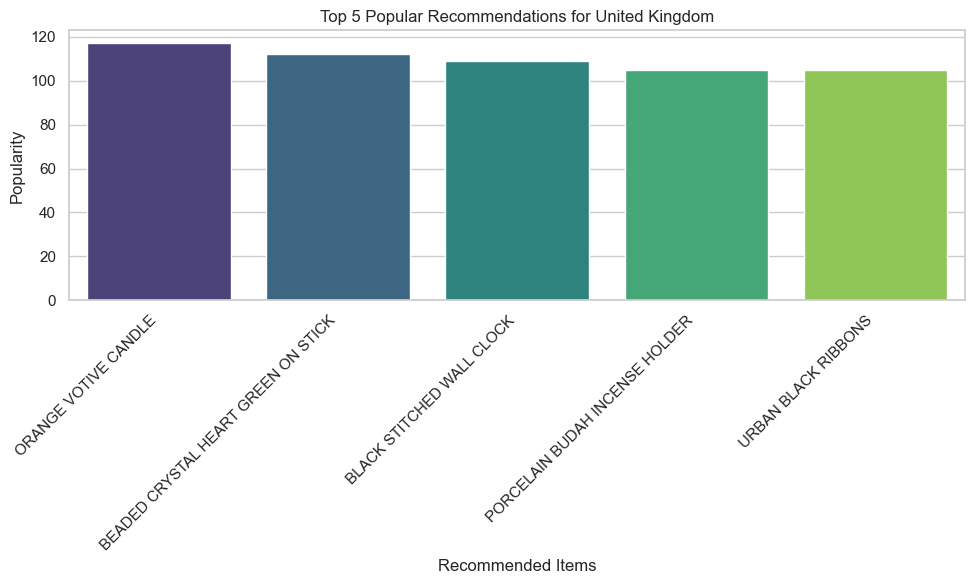

In [15]:
with open('recommendations_by_country.pkl', 'rb') as f:
    recommendations_by_country = pickle.load(f)

item_name = "GREEN VINTAGE SPOT BEAKER"
target_country = "United Kingdom"  

# Get recommendations for the target country
target_country_recommendations = recommendations_by_country.get(target_country, {})

# Count the occurrences of each recommended item
country_recommendations_count = {}
for year_month, month_recommendations in target_country_recommendations.items():
    for recommendations_list in month_recommendations.values():
        for item in recommendations_list:
            if item in country_recommendations_count:
                country_recommendations_count[item] += 1
            else:
                country_recommendations_count[item] = 1

# Sort the recommended items by popularity
sorted_recommendations = sorted(country_recommendations_count.items(), key=lambda x: x[1], reverse=True)

# Print the top 5 popular recommendations for the specific country
print(f"Top Popular Recommendations in {target_country} for {item_name}:")
for recommended_item, popularity in sorted_recommendations[:5]:
    print(f"{recommended_item}: {popularity} times")
    
top_recommended_items_df = pd.DataFrame(sorted_recommendations[:5], columns=['Recommended Items', 'Popularity'])

    
# Create a figure with a subplot
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Create a bar chart for top recommended items with popularity
sns.barplot(data=top_recommended_items_df, x='Recommended Items', y='Popularity', ax=axes, palette='viridis')
axes.set_title(f'Top 5 Popular Recommendations for {target_country}')
axes.set_xlabel('Recommended Items')
axes.set_ylabel('Popularity')

# Rotate x-axis labels for better readability
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Top Recommended Items for 2011-1 in United Kingdom:
FAUX FUR CHOCOLATE THROW: 54 times
SQUARECUSHION COVER PINK UNION FLAG: 45 times
PAPER POCKET TRAVELING FAN: 37 times
MAGIC TREE -PAPER FLOWERS: 33 times
TUMBLER, NEW ENGLAND: 31 times


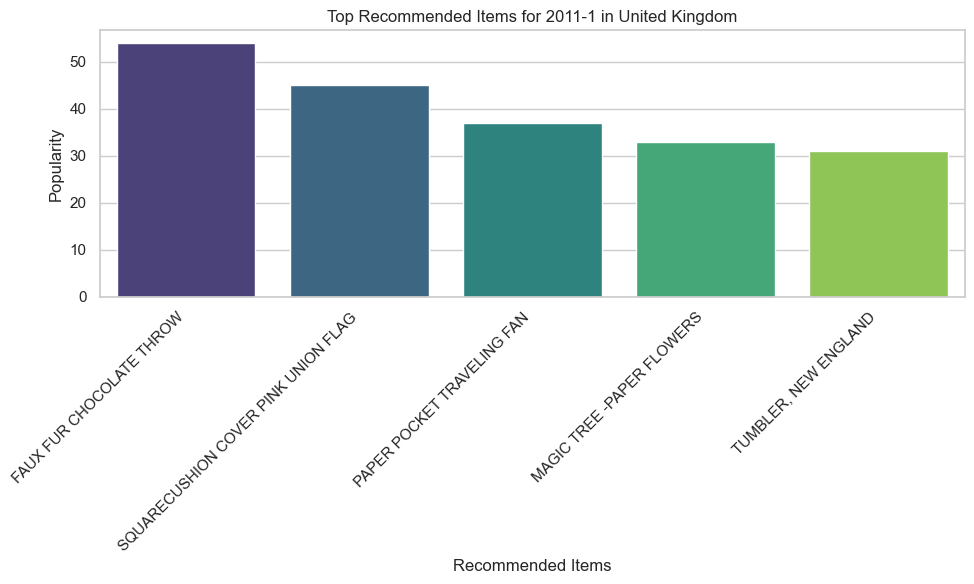

In [16]:
item_name = "WHITE HANGING HEART T-LIGHT HOLDER"
target_country = "United Kingdom"  # Specify the specific country you're interested in
target_month = (2011, 1)  # Specify the desired year and month

# Get recommendations for the target country and month
target_month_recommendations = recommendations_by_country.get(target_country, {}).get(target_month, {})

# Count the occurrences of each recommended item for the month
month_recommendations_count = {}
for recommendations_list in target_month_recommendations.values():
    for item in recommendations_list:
        if item in month_recommendations_count:
            month_recommendations_count[item] += 1
        else:
            month_recommendations_count[item] = 1

# Sort the recommended items by popularity for the month
sorted_recommendations = sorted(month_recommendations_count.items(), key=lambda x: x[1], reverse=True)

# Print the top recommended items for the specific month
print(f"Top Recommended Items for {target_month[0]}-{target_month[1]} in {target_country}:")
for recommended_item, popularity in sorted_recommendations[:5]:
    print(f"{recommended_item}: {popularity} times")
    
top_recommended_items_df = pd.DataFrame(sorted_recommendations[:5], columns=['Recommended Items', 'Popularity'])

# Create a figure with a subplot
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Create a bar chart for top recommended items with popularity for the specific month
sns.barplot(data=top_recommended_items_df, x='Recommended Items', y='Popularity', ax=axes, palette='viridis')
axes.set_title(f'Top Recommended Items for {target_month[0]}-{target_month[1]} in {target_country}')
axes.set_xlabel('Recommended Items')
axes.set_ylabel('Popularity')

# Rotate x-axis labels for better readability
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()